# Initial EDA for World Health Dataframe

## Imports & Initial
***

### Imports

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Read csv and turn into pandas dataframe.

In [3]:
health_stats_df = pd.read_csv("../data/health_stats_global.csv")

### Clean Dataframe

Steps:
1. Drop irrelevant columns
2. Get countries only(no groupings)
3. Set multi-index, country name > indicator name
4. Get most reliable years

In [4]:
# Dataframe Cleaning

# Step 1
cleandf = health_stats_df.drop(['Indicator Code','Country Code','Unnamed: 60'], axis=1)
# Step 2
cleandf = cleandf.set_index('Country Name')
cleandf = cleandf.loc['Afghanistan':, :]
# Step 3
cleandf = cleandf.reset_index()
cleandf = cleandf.set_index(['Country Name', 'Indicator Name'])
#Step 4
cleandf = cleandf.loc[:, '1990':'2014']

cleandf

1990  \
Country Name Indicator Name                                                   
Afghanistan  % of females ages 15-49 having comprehensive co...         NaN   
             % of males ages 15-49 having comprehensive corr...         NaN   
             Adolescent fertility rate (births per 1,000 wom...  162.738000   
             Adults (ages 15+) and children (0-14 years) liv...  500.000000   
             Adults (ages 15+) and children (ages 0-14) newl...  100.000000   
...                                                                     ...   
Zimbabwe     Use of insecticide-treated bed nets (% of under...         NaN   
             Use of Intermittent Preventive Treatment of mal...         NaN   
             Vitamin A supplementation coverage rate (% of c...         NaN   
             Wanted fertility rate (births per woman)                   NaN   
             Women's share of population ages 15+ living wit...   53.380109   

                                                                       1991  \
Country Name Indicator Name                                                   
Afghanistan  % of females ages 15-49 having comprehensive co...         NaN   
             % of males ages 15-49 having comprehensive corr...         NaN   
             Adolescent fertility rate (births per 1,000 wom...  163.327000   
             Adults (ages 15+) and children (0-14 years) liv...  500.000000   
             Adults (ages 15+) and children (ages 0-14) newl...  200.000000   
...                                                                     ...   
Zimbabwe     Use of insecticide-treated bed nets (% of under...         NaN   
             Use of Intermittent Preventive Treatment of mal...         NaN   
             Vitamin A supplementation coverage rate (% of c...         NaN   
             Wanted fertility rate (births per woman)                   NaN   
             Women's share of population ages 15+ living wit...   54.085606   

                                                                        1992  \
Country Name Indicator Name                                                    
Afghanistan  % of females ages 15-49 having comprehensive co...          NaN   
             % of males ages 15-49 having comprehensive corr...          NaN   
             Adolescent fertility rate (births per 1,000 wom...   163.916000   
             Adults (ages 15+) and children (0-14 years) liv...  1000.000000   
             Adults (ages 15+) and children (ages 0-14) newl...   200.000000   
...                                                                      ...   
Zimbabwe     Use of insecticide-treated bed nets (% of under...          NaN   
             Use of Intermittent Preventive Treatment of mal...          NaN   
             Vitamin A supplementation coverage rate (% of c...          NaN   
             Wanted fertility rate (births per woman)                    NaN   
             Women's share of population ages 15+ living wit...    54.636842   

                                                                        1993  \
Country Name Indicator Name                                                    
Afghanistan  % of females ages 15-49 having comprehensive co...          NaN   
             % of males ages 15-49 having comprehensive corr...          NaN   
             Adolescent fertility rate (births per 1,000 wom...   164.181200   
             Adults (ages 15+) and children (0-14 years) liv...  1000.000000   
             Adults (ages 15+) and children (ages 0-14) newl...   200.000000   
...                                                                      ...   
Zimbabwe     Use of insecticide-treated bed nets (% of under...          NaN   
             Use of Intermittent Preventive Treatment of mal...          NaN   
             Vitamin A supplementation coverage rate (% of c...          NaN   
             Wanted fertility rate (births per woman)                    NaN   
             W

### Get information

In [5]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 74865 entries, ('Afghanistan', '% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)') to ('Zimbabwe', "Women's share of population ages 15+ living with HIV (%)")
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    42236 non-null  float64
 1   1991    42137 non-null  float64
 2   1992    42721 non-null  float64
 3   1993    42259 non-null  float64
 4   1994    42509 non-null  float64
 5   1995    45513 non-null  float64
 6   1996    45634 non-null  float64
 7   1997    45725 non-null  float64
 8   1998    45584 non-null  float64
 9   1999    46579 non-null  float64
 10  2000    49859 non-null  float64
 11  2001    47016 non-null  float64
 12  2002    47542 non-null  float64
 13  2003    47097 non-null  float64
 14  2004    47493 non-null  float64
 15  2005    48234 non-null  float64
 16  2006    48462 non-

In [32]:
cleandf.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,4.223600e+04,4.213700e+04,4.272100e+04,4.225900e+04,4.250900e+04,4.551300e+04,4.563400e+04,4.572500e+04,4.558400e+04,4.657900e+04,...,4.823400e+04,4.846200e+04,4.826200e+04,4.791600e+04,4.845400e+04,5.055200e+04,4.882400e+04,4.864200e+04,4.704800e+04,4.693300e+04
mean,8.719148e+05,9.106322e+05,9.118048e+05,9.353936e+05,9.430628e+05,5.728263e+07,5.871406e+07,5.885671e+07,6.034102e+07,6.199366e+07,...,9.491878e+07,1.012523e+08,1.129394e+08,1.253958e+08,1.270751e+08,1.288872e+08,1.451495e+08,1.486859e+08,1.577477e+08,1.628760e+08
std,1.312184e+07,1.345333e+07,1.355459e+07,1.381493e+07,1.395581e+07,5.242241e+09,5.407298e+09,5.601553e+09,5.882506e+09,6.197652e+09,...,9.495706e+09,1.007190e+10,1.078955e+10,1.142368e+10,1.180878e+10,1.203940e+10,1.285630e+10,1.334380e+10,1.392372e+10,1.464225e+10
min,-6.258004e+01,-1.047807e+02,-2.276004e+06,-1.718503e+01,-1.815406e+01,-1.734616e+01,-1.488873e+02,-1.844707e+06,-7.441263e+00,-1.095515e+01,...,-9.104531e+00,-7.943870e+00,-3.570954e+06,-7.720454e+00,-7.829848e+00,-9.816607e+00,-8.166639e+00,-4.029996e+06,-7.726345e+00,-7.709485e+00
25%,1.441775e+01,1.402855e+01,1.305225e+01,1.390378e+01,1.414700e+01,1.300000e+01,1.297156e+01,1.231229e+01,1.292517e+01,1.313277e+01,...,1.253453e+01,1.250000e+01,1.200998e+01,1.200000e+01,1.219030e+01,1.189136e+01,1.255034e+01,1.118368e+01,1.200000e+01,1.255643e+01
50%,3.600210e+02,4.960000e+02,3.315000e+02,4.820000e+02,3.950000e+02,1.043590e+02,1.023298e+02,1.030000e+02,1.041210e+02,1.000000e+02,...,9.730000e+01,9.700000e+01,9.780000e+01,9.800000e+01,9.800000e+01,9.353989e+01,9.800000e+01,9.800000e+01,9.970000e+01,9.915900e+01
75%,7.689050e+04,8.060900e+04,7.989700e+04,8.262100e+04,8.259000e+04,7.257400e+04,7.311150e+04,7.406600e+04,7.502450e+04,7.069500e+04,...,6.658125e+04,6.607575e+04,6.886475e+04,7.088350e+04,6.826625e+04,6.062475e+04,6.799675e+04,6.933675e+04,8.035900e+04,8.191500e+04
max,1.135185e+09,1.150780e+09,1.164970e+09,1.178440e+09,1.191835e+09,1.002969e+12,1.056598e+12,1.115891e+12,1.180441e+12,1.254920e+12,...,1.984222e+12,2.115800e+12,2.253595e+12,2.358301e+12,2.451062e+12,2.546451e+12,2.646913e+12,2.750543e+12,2.833419e+12,2.985748e+12


#### Lists of countries and indicators

In [ ]:
# Get names of index levels
index_names = cleandf.index.names

##### A list of indicator names:

In [35]:
# Print list of indicator names
indicator_names = cleandf.index.levels[cleandf.index.names.index(f'{index_names[1]}')]

for indicator in indicator_names:
    print(indicator)

% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)
AIDS estimated deaths (UNAIDS estimates)
ARI treatment (% of children under 5 taken to a health provider)
Adolescent fertility rate (births per 1,000 women ages 15-19)
Adults (ages 15+) and children (0-14 years) living with HIV
Adults (ages 15+) and children (ages 0-14) newly infected with HIV
Adults (ages 15+) living with HIV
Adults (ages 15+) newly infected with HIV
Age at first marriage, female
Age at first marriage, male
Age dependency ratio (% of working-age population)
Age dependency ratio, old
Age dependency ratio, young
Age population, age 0, female, interpolated
Age population, age 0, male, interpolated
Age population, age 01, female, interpolated
Age population, age 01, male, interpolated
Age population, age 02, female, interpolated
Age populatio

##### A list of country names:

In [36]:
# Print list of country names
country_names = cleandf.index.levels[cleandf.index.names.index(f'{index_names[0]}')]

for country in country_names:
    print(country)

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt, Arab Rep.
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Faroe Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong SAR, China
Hungary
Iceland
India
Indonesia
Iran, Islamic Rep.
Iraq
Ireland
Isle of Man
Israel
Italy
Jamaica
Japan
Jordan
Kaz

## Functions for exploring df and tests:
***

### Functions:

In [8]:
def multi_indexer(country, indicator):
    '''
    Inputs: Country Name and Indicator Name

    Outputs: Series containing data given country and indicator for each year
    '''
    return cleandf.loc[(country, indicator)]

In [9]:
def plot_inputs(country, indicator1, indicator2):
    '''
    Inputs: Country name, indicator name 1, indicator name 2

    Outputs: A scatter plot containing the comparison between indicator of name 1 vs indicator of name 2
    '''

    x_vals = cleandf.loc[(country, indicator1)]
    y_vals = cleandf.loc[(country, indicator2)]
    fig, ax = plt.subplots()
    ax.scatter(x = x_vals, y = y_vals)
    ax.set_title(f'{indicator1} vs {indicator2}')
    ax.set_xlabel(f'{indicator1}')
    ax.set_ylabel(f'{indicator2}')
    plt.show()

In [10]:
def nan_counter(dataframe):
    '''
    Inputs: A 2-level multi-index dataframe

    Outputs: A dataframe containing Nan Counts for each level-index combination
    ----------------------------------------------------------------------------
    Notes: could easily be modified to handle more or less than 2 level indexing    
    '''
    
    # get names for levels of multi-index
    index_names = dataframe.index.names

    # use index names to create arrays that reflect all names contained under each level
    level_0 = dataframe.index.levels[dataframe.index.names.index(f'{index_names[0]}')]
    level_1 = dataframe.index.levels[dataframe.index.names.index(f'{index_names[1]}')]

    # empty dataframe for containing counts
    nans_count_df = pd.DataFrame(np.zeros(shape=(len(level_1), len(level_0))),
                                        columns=level_0, index=level_1)

    # loop for getting nan counts and storing in dataframe using indexes to locate
    for idx1, name1 in enumerate(level_0):
        for idx2, name2 in enumerate(level_1):
            nans_count_df.iloc[(idx2, idx1)] = dataframe.loc[(name1, name2)].isna().sum()

    nans_count_df.loc[f'{index_names[0]} Totals'] = nans_count_df.sum()
    nans_count_df[f'{index_names[1]} Totals'] = nans_count_df.sum(axis=1)

    return nans_count_df

In [75]:
def data_verification(countries, indicators):
    '''
    Inputs: A list of countries and a list of indicators

    Outputs: A dataframe of the number of NaNs for each country and each indicator
    -----------------------------------------------------------------------------
    Note: Best done in small batches
    '''
    nans_count_df = pd.DataFrame(np.zeros(shape=(len(countries), len(indicators))),
                                            columns=indicators, index=countries)

    for idx1, country in enumerate(country_list):
        for idx2, indicator in enumerate(indicator_list):
            nans_count_df.iloc[(idx1, idx2)] = multi_indexer(country, indicator).isna().sum()

    return nans_count_df

In [131]:
def linreg_summary(country, indicators):
    '''
    Inputs: A country and a list of indicators

    Outputs: statsmodels.iolib.summary.Summary object
    --------------------------------------------------
    Note: will be adjusted to include multiple countries
    '''
    length = len(multi_indexer(country, indicators[0]).index)
    width = len(indicators)
    index = multi_indexer(country, indicators[0]).index

    data_df = pd.DataFrame(np.zeros(shape=(length, width)),
                                            columns=indicators, index=index)
    
    for i in range(len(indicators)):
        # print(i)
        data_df.iloc[:, i] = multi_indexer(country, indicators[i])
    
    X = data_df.iloc[:, 1:]
    y = data_df.iloc[:,0]

    X = sm.add_constant(X)

    model = sm.OLS(y,X).fit()
    predictions = model.predict(X)
    res = model.resid

    model.summary()
    return model.summary()
    # return data_df


### Test multi_indexer:

In [12]:
cleandf.loc['China']

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Indicator Name,,,,,,,,,,,,,,,,,,,,,
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Adolescent fertility rate (births per 1,000 women ages 15-19)",19.8136,18.5128,17.212,15.7114,14.2108,12.7102,11.2096,9.709,9.3968,9.0846,...,7.9722,7.9136,7.855,7.7882,7.7214,7.6546,7.5878,7.521,7.4344,7.3478
Adults (ages 15+) and children (0-14 years) living with HIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adults (ages 15+) and children (ages 0-14) newly infected with HIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Use of insecticide-treated bed nets (% of under-5 population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Use of Intermittent Preventive Treatment of malaria, 2+ doses of SP/Fansidar (% of pregnant women)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vitamin A supplementation coverage rate (% of children ages 6-59 months),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
multi_indexer('China', 'Tuberculosis death rate (per 100,000 people)')

1990    19.0
1991    18.0
1992    17.0
1993    16.0
1994    15.0
1995    14.0
1996    13.0
1997    12.0
1998    11.0
1999     9.6
2000     8.7
2001     8.0
2002     7.3
2003     6.7
2004     6.2
2005     5.7
2006     5.3
2007     4.9
2008     4.5
2009     4.2
2010     3.8
2011     3.5
2012     3.3
2013     3.0
2014     2.8
Name: (China, Tuberculosis death rate (per 100,000 people)), dtype: float64

In [14]:
multi_indexer('China', 'Prevalence of undernourishment (% of population)')

1990     NaN
1991    23.9
1992    24.5
1993    23.4
1994    22.0
1995    20.1
1996    18.5
1997    17.6
1998    16.9
1999    16.5
2000    16.2
2001    16.0
2002    15.9
2003    15.9
2004    15.8
2005    15.6
2006    15.3
2007    14.8
2008    14.1
2009    13.3
2010    12.5
2011    11.7
2012    11.0
2013    10.4
2014     9.8
Name: (China, Prevalence of undernourishment (% of population)), dtype: float64

### Test plot_inputs:

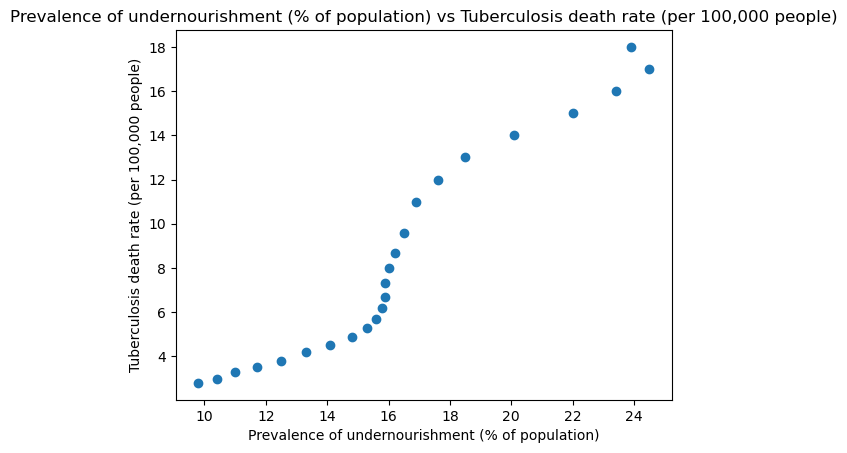

In [15]:
plot_inputs('China', 'Prevalence of undernourishment (% of population)', 'Tuberculosis death rate (per 100,000 people)')

### Test nan_counter & find countries/indicators with least NaNs:

In [186]:
# Test
nan_df = nan_counter(cleandf)
nan_df

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,Indicator Name Totals
Indicator Name,,,,,,,,,,,,,,,,,,,,,
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),24.0,22.0,23.0,25.0,25.0,25.0,25.0,24.0,22.0,25.0,...,22.0,24.0,25.0,20.0,25.0,23.0,24.0,22.0,21.0,5164.0
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions),25.0,24.0,25.0,25.0,25.0,25.0,25.0,25.0,22.0,25.0,...,24.0,25.0,25.0,24.0,25.0,25.0,25.0,22.0,22.0,5283.0
AIDS estimated deaths (UNAIDS estimates),0.0,25.0,0.0,25.0,25.0,0.0,25.0,0.0,0.0,25.0,...,0.0,25.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,2750.0
ARI treatment (% of children under 5 taken to a health provider),24.0,22.0,21.0,25.0,25.0,25.0,25.0,24.0,22.0,25.0,...,23.0,24.0,24.0,19.0,25.0,22.0,20.0,20.0,20.0,5022.0
"Adolescent fertility rate (births per 1,000 women ages 15-19)",0.0,0.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Use of insecticide-treated bed nets (% of under-5 population),25.0,25.0,25.0,25.0,25.0,22.0,25.0,25.0,25.0,25.0,...,25.0,22.0,25.0,21.0,25.0,25.0,25.0,17.0,21.0,5223.0
Vitamin A supplementation coverage rate (% of children ages 6-59 months),10.0,25.0,25.0,25.0,25.0,11.0,25.0,25.0,25.0,25.0,...,10.0,25.0,25.0,10.0,25.0,25.0,12.0,12.0,10.0,4446.0
Wanted fertility rate (births per woman),25.0,23.0,25.0,25.0,25.0,25.0,25.0,25.0,22.0,25.0,...,24.0,25.0,25.0,23.0,25.0,25.0,22.0,20.0,21.0,5180.0


In [265]:
# Search
zero_nans = nan_df[nan_df['Peru'] < 2]['Peru']

for x in range(len(zero_nans)):
    print(f'{zero_nans.index[x]} {zero_nans[x]}')

AIDS estimated deaths (UNAIDS estimates) 0.0
Adolescent fertility rate (births per 1,000 women ages 15-19) 0.0
Adults (ages 15+) and children (0-14 years) living with HIV 0.0
Adults (ages 15+) and children (ages 0-14) newly infected with HIV 0.0
Adults (ages 15+) living with HIV 0.0
Adults (ages 15+) newly infected with HIV 0.0
Age dependency ratio (% of working-age population) 0.0
Age dependency ratio, old 0.0
Age dependency ratio, young 0.0
Age population, age 0, female, interpolated 0.0
Age population, age 0, male, interpolated 0.0
Age population, age 01, female, interpolated 0.0
Age population, age 01, male, interpolated 0.0
Age population, age 02, female, interpolated 0.0
Age population, age 02, male, interpolated 0.0
Age population, age 03, female, interpolated 0.0
Age population, age 03, male, interpolated 0.0
Age population, age 04, female, interpolated 0.0
Age population, age 04, male, interpolated 0.0
Age population, age 05, female, interpolated 0.0
Age population, age 05, ma

#### Minimum NaNs by Country:

In [17]:
nan_df.loc[['Country Name Totals'] ,nan_df.loc['Country Name Totals', :] == nan_df.loc['Country Name Totals', :].min()]

Country Name,Peru
Indicator Name,
Country Name Totals,1998.0


In [18]:
nan_df.loc[['Country Name Totals'] ,nan_df.loc['Country Name Totals', :] < 2200]

Country Name,Bangladesh,Burkina Faso,Colombia,Dominican Republic,Ghana,Indonesia,Mexico,Peru
Indicator Name,,,,,,,,
Country Name Totals,2092.0,2159.0,2143.0,2175.0,2196.0,2011.0,2175.0,1998.0


In [19]:
nan_df['Peru']

Indicator Name
% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)      22.0
% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)        25.0
AIDS estimated deaths (UNAIDS estimates)                                                                                    0.0
ARI treatment (% of children under 5 taken to a health provider)                                                           13.0
Adolescent fertility rate (births per 1,000 women ages 15-19)                                                               0.0
                                                                                                                          ...  
Use of insecticide-treated bed nets (% of under-5 population)                                                              25.0
Vitamin A supplementation coverage rate (% of children ages 6-59 months)                 

#### Minimum NaNs by Indicator:

In [41]:
min_indicator = nan_df.loc[:, 'Indicator Name Totals'].min()

min_mask = nan_df.loc[:, 'Indicator Name Totals'] == min_indicator

nan_df.loc[:, 'Indicator Name Totals'][min_mask]

Indicator Name
Population, total    14.0
Name: Indicator Name Totals, dtype: float64

In [46]:
less_mask = nan_df.loc[:, 'Indicator Name Totals'] < 500

nan_df.loc[:, 'Indicator Name Totals'][less_mask]


Indicator Name
Birth rate, crude (per 1,000 people)                   345.0
Death rate, crude (per 1,000 people)                   363.0
Fertility rate, total (births per woman)               445.0
Incidence of tuberculosis (per 100,000 people)         278.0
Life expectancy at birth, female (years)               443.0
Life expectancy at birth, male (years)                 443.0
Life expectancy at birth, total (years)                443.0
Population growth (annual %)                            21.0
Population, total                                       14.0
Prevalence of tuberculosis (per 100,000 population)    278.0
Rural population                                        64.0
Rural population (% of total population)                53.0
Rural population growth (annual %)                     248.0
Tuberculosis death rate (per 100,000 people)           278.0
Urban population                                        64.0
Urban population (% of total)                           53.0
Urban pop

In [ ]:
# verify nan_counter
multi_indexer('Angola',"Vitamin A supplementation coverage rate (% of children ages 6-59 months)")

1990     NaN
1991     NaN
1992     NaN
1993     NaN
1994     NaN
1995     NaN
1996     NaN
1997     NaN
1998     NaN
1999    94.0
2000     NaN
2001     NaN
2002    64.0
2003    68.0
2004     7.0
2005    65.0
2006    80.0
2007    36.0
2008    82.0
2009    28.0
2010    28.0
2011    55.0
2012    44.0
2013    48.0
2014     6.0
Name: (Angola, Vitamin A supplementation coverage rate (% of children ages 6-59 months)), dtype: float64

## Brainstorming
***

#### Lowest amount of NaN values:

- Countries
    - Peru
    - Indonesia
    - Bangladesh
    - Colombia
    - Burkina Faso
    - and more...

- Indicators
    - Population
    - Birth rate, crude (per 1,000 people)
    - Death rate, crude (per 1,000 people)
    - Fertility rate, total (births per woman)
    - Incidence of tuberculosis (per 100,000 people)
    - Life expectancy at birth, total (years)
    - and more...

#### Hypothesis Test Idea:

##### Parameters

Indicators:
- Improved water source access
- Population size

Countries:
- U.S.
- China

##### Testing

1. Verify that each country contains the appropriate data

In [47]:
multi_indexer('China', "Population, total")

1990    1.135185e+09
1991    1.150780e+09
1992    1.164970e+09
1993    1.178440e+09
1994    1.191835e+09
1995    1.204855e+09
1996    1.217550e+09
1997    1.230075e+09
1998    1.241935e+09
1999    1.252735e+09
2000    1.262645e+09
2001    1.271850e+09
2002    1.280400e+09
2003    1.288400e+09
2004    1.296075e+09
2005    1.303720e+09
2006    1.311020e+09
2007    1.317885e+09
2008    1.324655e+09
2009    1.331260e+09
2010    1.337705e+09
2011    1.344130e+09
2012    1.350695e+09
2013    1.357380e+09
2014    1.364270e+09
Name: (China, Population, total), dtype: float64

In [29]:
multi_indexer('China', 'Improved water source (% of population with access)')

1990    66.9
1991    68.3
1992    69.8
1993    71.2
1994    72.5
1995    73.9
1996    75.2
1997    76.5
1998    77.8
1999    79.1
2000    80.3
2001    81.6
2002    82.8
2003    84.0
2004    85.2
2005    86.3
2006    87.4
2007    88.5
2008    89.5
2009    90.5
2010    91.4
2011    92.3
2012    93.2
2013    94.0
2014    94.8
Name: (China, Improved water source (% of population with access)), dtype: float64

In [48]:
multi_indexer('United States', "Population, total")

1990    249623000.0
1991    252981000.0
1992    256514000.0
1993    259919000.0
1994    263126000.0
1995    266278000.0
1996    269394000.0
1997    272657000.0
1998    275854000.0
1999    279040000.0
2000    282162411.0
2001    284968955.0
2002    287625193.0
2003    290107933.0
2004    292805298.0
2005    295516599.0
2006    298379912.0
2007    301231207.0
2008    304093966.0
2009    306771529.0
2010    309346863.0
2011    311718857.0
2012    314102623.0
2013    316427395.0
2014    318907401.0
Name: (United States, Population, total), dtype: float64

In [50]:
multi_indexer('United States', 'Improved water source (% of population with access)')

1990    98.4
1991    98.4
1992    98.5
1993    98.5
1994    98.6
1995    98.6
1996    98.7
1997    98.7
1998    98.7
1999    98.8
2000    98.8
2001    98.8
2002    98.9
2003    98.9
2004    98.9
2005    99.0
2006    99.0
2007    99.0
2008    99.0
2009    99.1
2010    99.1
2011    99.1
2012    99.1
2013    99.2
2014    99.2
Name: (United States, Improved water source (% of population with access)), dtype: float64

2. Plot the relationships between indicators for each country

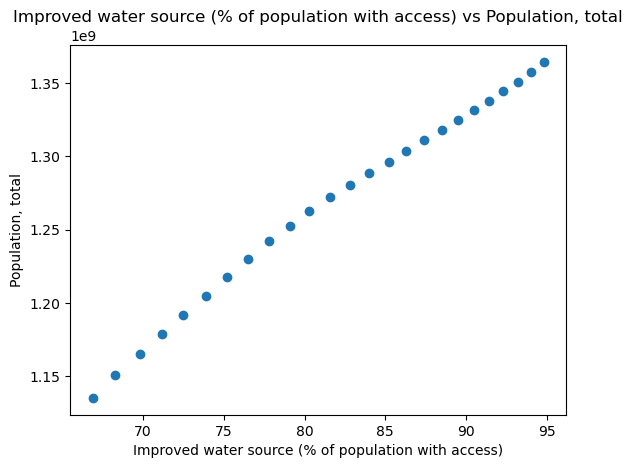

In [30]:
plot_inputs('China','Improved water source (% of population with access)' ,"Population, total")

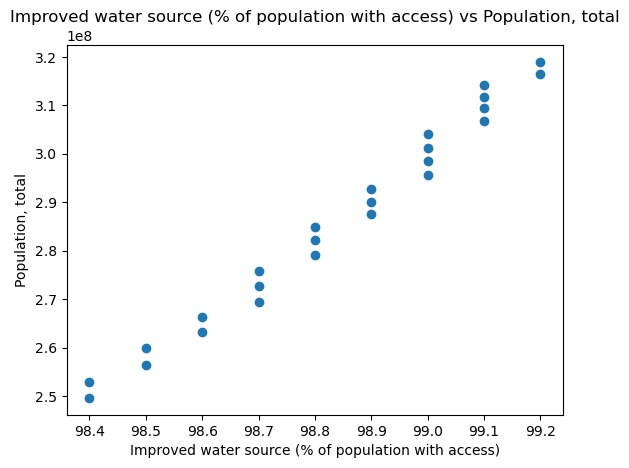

In [31]:
plot_inputs('United States','Improved water source (% of population with access)' ,"Population, total")

#### Linear Regression Idea:

##### Parameters

Target: 
- Population

Relevant Indicators(Features):
- 'Improved water source (% of population with access)'
- 'Health expenditure per capita (current US$)'
- 'Improved sanitation facilities (% of population with access)'
- 'Physicians (per 1,000 people)'
- 'Specialist surgical workforce (per 100,000 population)'
- 'Community health workers (per 1,000 people)'
- 'Number of people who are undernourished'

Experimental Indicators(Features):
- 'Rural population (% of total population)'
- 'Urban population (% of total)'
- 'Labor force, total'

Western Countries:
- 'United States'
- 'Germany'
- 'Canada'
- 'Italy'
- 'Sweden'
- 'Spain'
- 'Australia'
- 'France'
- 'Greece'
- 'United Kingdom'
- 'New Zealand'

##### Testing

1. Verify that each country contains the neccessary data

In [277]:
# lists containing the indicators and countries
indicator_list = ['Maternal mortality ratio (modeled estimate, per 100,000 live births)', 
                    # 'Rural population (% of total population)',
                    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
                    # 'Birth rate, crude (per 1,000 people)',
                    # 'Number of under-five deaths',
                    # 'Tuberculosis death rate (per 100,000 people)',
                    # 'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
                    # 'School enrollment, primary (% gross)',
                    # 'Death rate, crude (per 1,000 people)'
                    ]

country_list = ['Peru',
                ]

In [278]:
# testing to see how much data is present

data_verification(country_list, indicator_list)

,"Maternal mortality ratio (modeled estimate, per 100,000 live births)","Adolescent fertility rate (births per 1,000 women ages 15-19)"
Peru,0.0,0.0


In [279]:
# testing linear regression for one country
df = linreg_summary('Peru', indicator_list)
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     Maternal mortality ratio (modeled estimate, per 100,000 live births)   R-squared:                       0.890
Model:                                                                              OLS   Adj. R-squared:                  0.885
Method:                                                                   Least Squares   F-statistic:                     186.1
Date:                                                                  Wed, 08 Nov 2023   Prob (F-statistic):           1.64e-12
Time:                                                                          22:33:25   Log-Likelihood:                -109.22
No. Observations:                                                                    25   AIC:                             222.4
Df Residuals:                                                                        23   BIC:                             224.9
Df Model:                                                                             1                                         
Covariance Type:                                                              nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                          -299.5632     32.768     -9.142      0.000    -367.350    -231.777
Adolescent fertility rate (births per 1,000 women ages 15-19)     7.1947      0.527     13.641      0.000       6.104       8.286
==============================================================================
Omnibus:                        0.331   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.847   Jarque-Bera (JB):                0.418
Skew:                           0.235   Prob(JB):                        0.811
Kurtosis:                       2.576   Cond. No.                         511.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

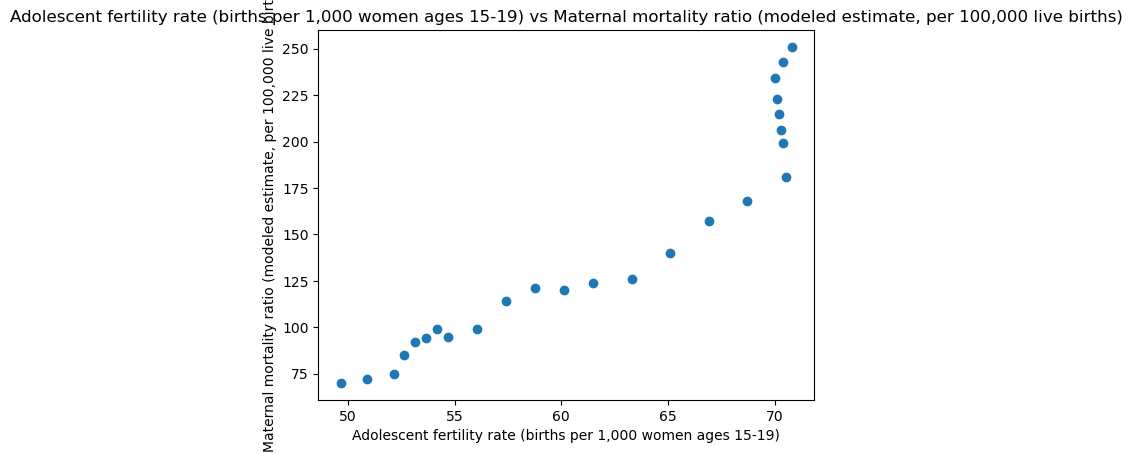

In [280]:
plot_inputs('Peru', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Maternal mortality ratio (modeled estimate, per 100,000 live births)')